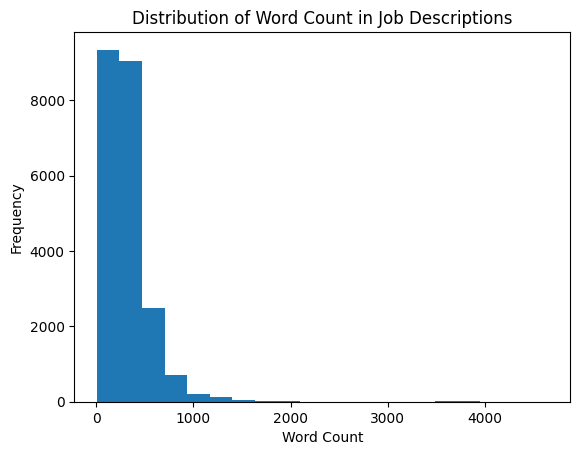

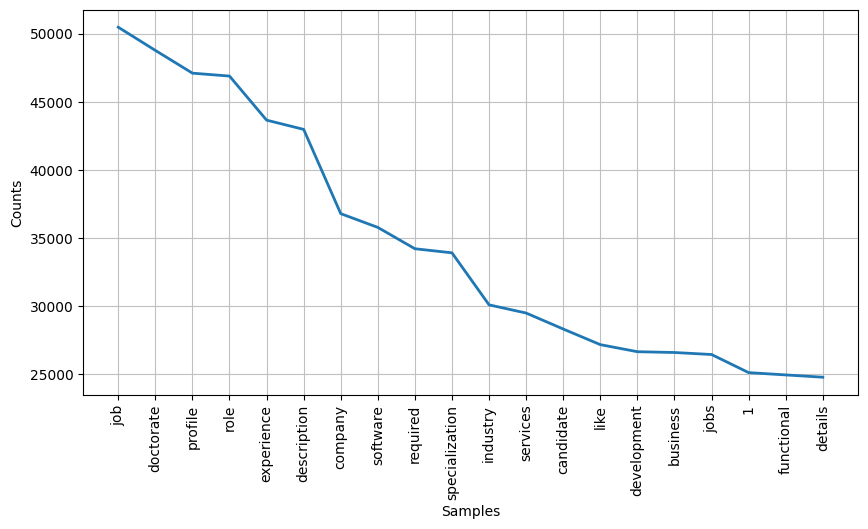

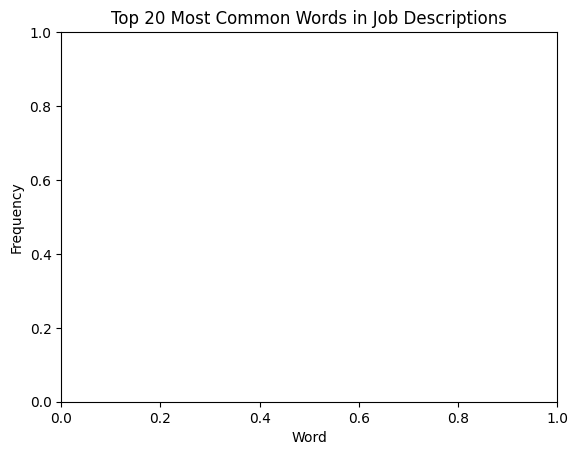

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv("apni_csv.csv")

# Data Cleaning
df = df.dropna(subset=["jobdescription"])
df["jobdescription"] = df["jobdescription"].str.lower()

# Tokenization and Word Count
df["word_count"] = df["jobdescription"].apply(lambda x: len(word_tokenize(x)))
plt.hist(df["word_count"], bins=20)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Count in Job Descriptions")
plt.show()

# Text Preprocessing
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(filtered_tokens)

df["jobdescription"] = df["jobdescription"].apply(preprocess_text)

# Word Frequency Analysis
all_words = " ".join(df["jobdescription"])
words = word_tokenize(all_words)
fdist = FreqDist(words)
plt.figure(figsize=(10, 5))
fdist.plot(20, cumulative=False)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words in Job Descriptions")
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Job Descriptions")
plt.show()

# Sentiment Analysis
# You can use a sentiment analysis library or model to analyze sentiment.

# Company Analysis
company_counts = df["company"].value_counts()[:10]
plt.figure(figsize=(10, 5))
company_counts.plot(kind="bar")
plt.xlabel("Company")
plt.ylabel("Count")
plt.title("Top 10 Companies with Most Job Listings")
plt.xticks(rotation=45)
plt.show()

# Education, Experience, Industry, Location, Job Title, Skills, and Pay Rate Analysis
# You can perform similar analyses for these columns.

# More exploration and visualization can be added as needed.

# If you have more specific questions or need further assistance, please let me know.


In [ ]:
experience_counts = df["experience"].value_counts()
plt.figure(figsize=(10, 5))
experience_counts.plot(kind="bar")
plt.xlabel("Experience")
plt.ylabel("Count")
plt.title("Distribution of Required Years of Experience")
plt.xticks(rotation=45)
plt.show()


In [ ]:
industry_counts = df["industry"].value_counts()[:10]
plt.figure(figsize=(10, 5))
industry_counts.plot(kind="barh")
plt.ylabel("Industry")
plt.xlabel("Count")
plt.title("Top 10 Industries in Job Listings")
plt.show()


In [ ]:
location_counts = df["joblocation_address"].value_counts()[:10]
plt.figure(figsize=(10, 5))
location_counts.plot(kind="barh")
plt.ylabel("Location")
plt.xlabel("Count")
plt.title("Top 10 Job Locations")
plt.show()


In [ ]:
job_title_counts = df["jobtitle"].value_counts()[:10]
plt.figure(figsize=(10, 5))
job_title_counts.plot(kind="barh")
plt.ylabel("Job Title")
plt.xlabel("Count")
plt.title("Top 10 Job Titles")
plt.show()


In [ ]:
# Assuming skills are separated by commas in the "skills" column
all_skills = df["skills"].str.cat(sep=", ")
skills = word_tokenize(all_skills)
skills_freq = FreqDist(skills)
top_skills = skills_freq.most_common(10)
top_skills_df = pd.DataFrame(top_skills, columns=["Skill", "Count"])
plt.figure(figsize=(10, 5))
plt.barh(top_skills_df["Skill"], top_skills_df["Count"])
plt.xlabel("Count")
plt.ylabel("Skill")
plt.title("Top 10 Required Skills")
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all job descriptions into a single text
all_descriptions = ' '.join(df['jobdescription'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Descriptions')
plt.show()
